In [2]:
# Write and run code here
import pandas as pd
marketing = pd.read_csv("marketing.csv")

In [3]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [4]:
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [6]:
# Change the data type of a column
marketing['converted'] = marketing['converted'].astype('bool')

print(marketing['converted'].dtype)                

bool


In [7]:
#Creating a new column  
import numpy as np
marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'House Ads', True, False)

In [8]:
marketing.is_house_ads.head()

0    True
1    True
2    True
3    True
4    True
Name: is_house_ads, dtype: bool

In [9]:
#Mapping values to existing columns
channel_dict ={"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}
marketing['channel_code'] = marketing['marketing_channel'].map(channel_dict)

In [10]:
marketing["channel_code"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: channel_code, dtype: float64

In [11]:
# Read date columns using parse_dates
marketing = pd.read_csv('marketing.csv',parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

In [12]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [13]:
# How many users see marketing assets?
daily_users = marketing.groupby(["date_served"])["user_id"].nunique()
#print(daily_users)

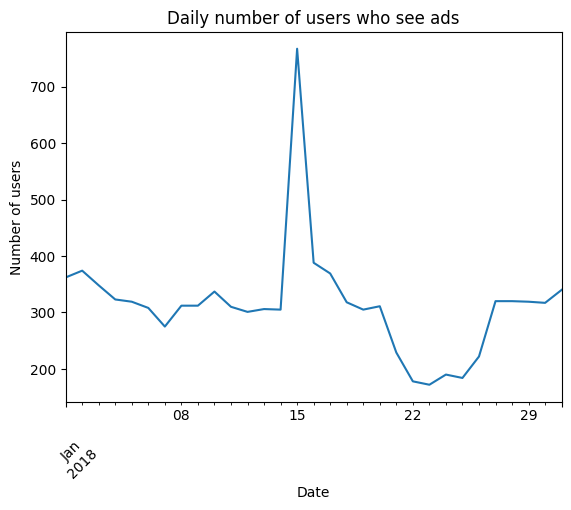

In [14]:
#Visualize the daily users results
import matplotlib.pyplot as plt
daily_users.plot()
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

In [15]:
marketing['is_correct_lang'] = np.where(marketing["language_displayed"]==marketing["language_preferred"], "Yes", "No")

In [16]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,Yes


In [17]:
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [18]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,Yes,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,Yes,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,Yes,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,Yes,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,Yes,0.0


**Common Marketing Metrics**: 
There are mainly two metrics: 
1. Conversion Rate: Number of people who convert / Total number of people we marketed to
2. Retention Rate: Number of people who remain subscribed / Total number of people who converted


In [19]:
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()
total = marketing['user_id'].nunique()
conv_rate = subscribers/total
print(round(conv_rate*100, 2), '%')

13.89 %


In [20]:
retained = marketing[marketing["is_retained"]== True]["user_id"].nunique()
ret_rate = retained/subscribers
print(round(ret_rate*100, 2),"%")

66.8 %


# **Customer segmentation**: 
Common ways to segment audiences: 
- Age
- Gender
- Location
- Past interaction(s) with the business
- Marketing channels usersinteracted with

In [21]:
#Subset to include only House Ads
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()
retention_rate = retained/subscribers
print(round(retention_rate*100,2), '%')

58.05 %


An easier way to segment is **using pandas - groupby()**

In [22]:
# Group by subscribing_channel and calculate retention
retained = marketing[marketing['is_retained'] == True].groupby(["subscribing_channel"])["user_id"].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [23]:
# Group by subscribing_channel and calculate subscribers 
subscribers = marketing[marketing['converted'] == True].groupby(["subscribing_channel"])["user_id"].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [24]:
# Calculate the retention rate across the DataFrame
channel_retention_rate = (retained/subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


# **Plotting campaign results**

In [25]:
#Lets compare language conversion rates
language_conversion= marketing[marketing['converted'] == True].groupby(["language_displayed"])["user_id"].nunique()
total = marketing.groupby(["language_displayed"])["user_id"].nunique()
language_conversion_rate = (language_conversion/total)*100
language_conversion_rate

language_displayed
Arabic     50.000000
English    12.916725
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64

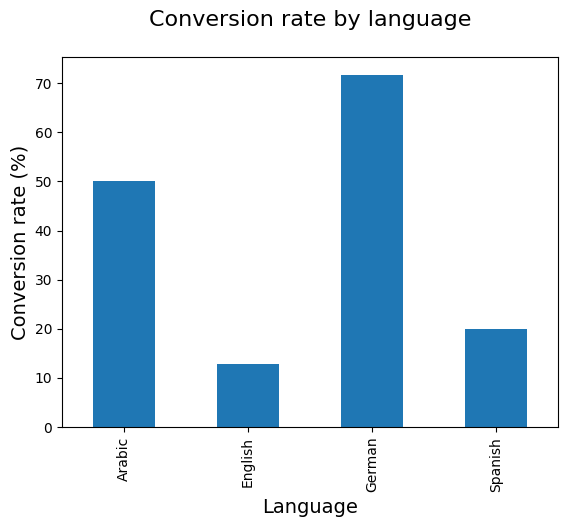

In [26]:
#Compare language conversion rate: 
import matplotlib.pyplot as plt
# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind = 'bar')
# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
# Display the plot
plt.show()

# Calculating subscriber quality

In [27]:
# Group by subscribed date and count unique users
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()
#Group by subscribed date and sum conversions 
retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()
# Calculate subscriber quality across dates
daily_retention_rate = retained/total

In [28]:
# Reset index to turn the Series into a DataFrame
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
# Rename columns
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']
daily_retention_rate.head()

,date_subscribed,retention_rate
0,2018-01-01,0.777778
1,2018-01-02,0.702703
2,2018-01-03,0.729730
3,2018-01-04,0.500000
4,2018-01-05,0.575000


## Visualizing data trended over time

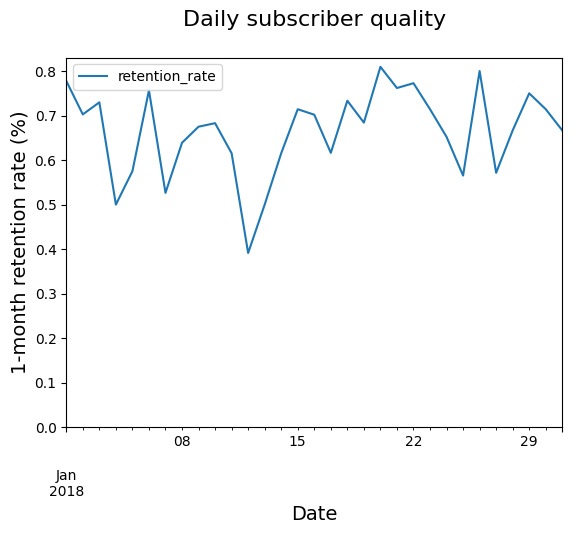

In [29]:
# Create a line chart using the daily_retention DataFrame
daily_retention_rate.plot('date_subscribed','retention_rate')
# Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate (%)', size = 14)
plt.xlabel('Date', size = 14)
# Set the y-axis to begin at 0
plt.ylim(0)
# Display the plot
plt.show()

Grouping by Served dates and prefered language

In [30]:
language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()
print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


Unstacking the above data after group by 

In [31]:
language = pd.DataFrame(language.unstack(level=1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,355.0,5.0,11.0
2018-01-02,4.0,397.0,6.0,10.0
2018-01-03,3.0,374.0,3.0,8.0
2018-01-04,2.0,318.0,2.0,14.0
2018-01-05,1.0,314.0,2.0,14.0


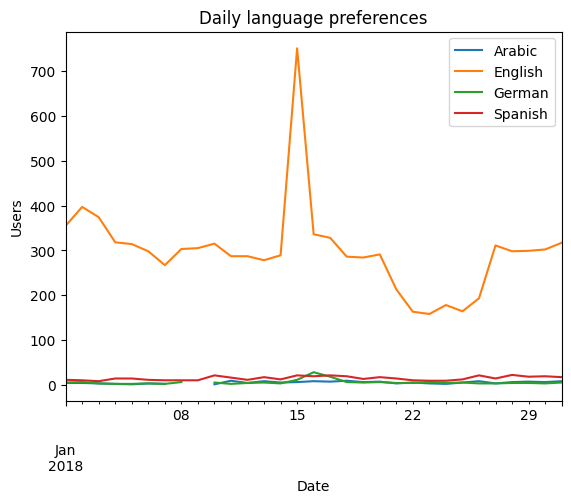

In [32]:
#Plotting preferred language over time 
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc = 'upper right',labels = language.columns.values)
plt.show()

Creating grouped bar charts

In [33]:
# Create DataFrame grouped by age and language preference
language_age = marketing.groupby(['language_preferred','age_group'])['user_id'].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
language_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


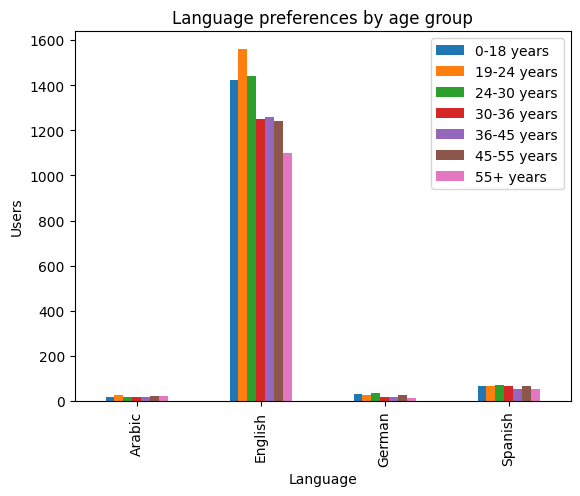

In [34]:
#Plotting language preferences by age group 
language_age.plot(kind='bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right', labels = language_age.columns.values)
plt.show()

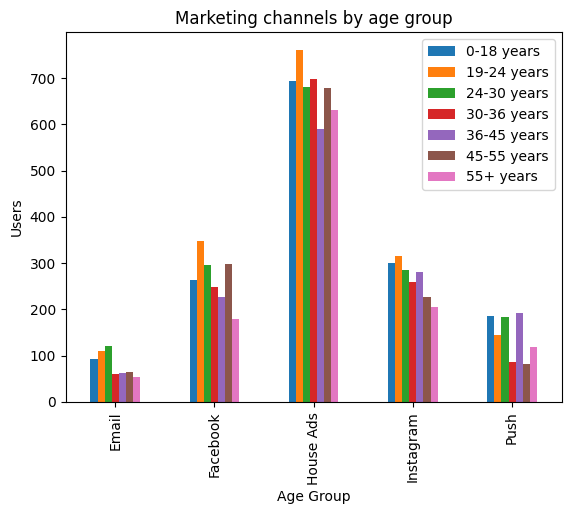

In [35]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()


                                            # CONVERSION ATTRIBUTION

# Building functions to automate analysis: 

In [36]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs =marketing[marketing["is_retained"]==True].groupby(['date_subscribed',"subscribing_channel"])["user_id"].nunique()
# Count the subs by subscribing channel and day
retention_total = marketing.groupby(['date_subscribed',
                                     "subscribing_channel"])["user_id"].nunique()

In [37]:
# Divide retained subscribers by total subscribers
daily_retention_rate = retention_subs/retention_total
daily_retention_rate = pd.DataFrame(daily_retention_rate.unstack(level=1))

In [38]:
daily_retention_rate.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.50,0.666667,0.466667,0.500000,NaN
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


In [39]:
#Building a retention function: 
def retention_rate(dataframe, column_names):
    # Group by column_names and calculate retention    
    retained = dataframe[dataframe['is_retained'] == True].groupby(column_names)['user_id'].nunique()
    # Group by column_names and calculate conversion    
    converted = dataframe.groupby(column_names)['user_id'].nunique()  
    retention_rate = retained/converted
    return retention_rate

In [40]:
#Retention rate by channel
daily_retention = retention_rate(marketing, ["date_subscribed","subscribing_channel"])
daily_retention =pd.DataFrame(daily_retention.unstack(level=1))

In [41]:
daily_retention.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,0.50,0.666667,0.466667,0.500000,NaN
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


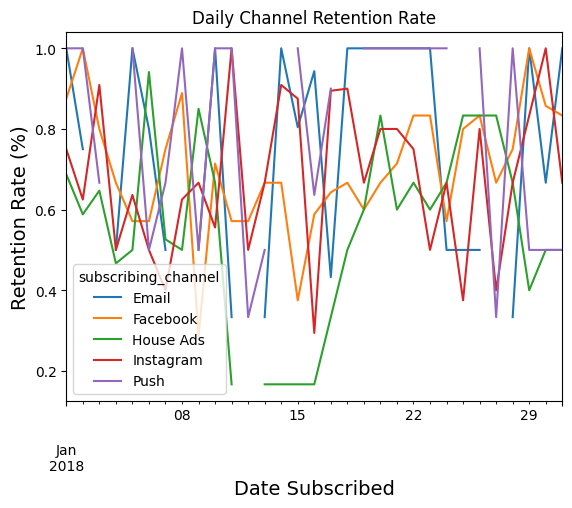

In [42]:
# Plot retention rate
daily_retention.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title("Daily Channel Retention Rate")
plt.xlabel("Date Subscribed", size=14)
plt.ylabel("Retention Rate (%)", size=14)
#plt.legend(loc="upper right", labels = retention_rate_df.columns.values)
plt.show()

In [43]:
#Plotting function
def plotting(dataframe):
    for column in dataframe:        
        plt.plot(dataframe.index, dataframe[column])        
        plt.title('Daily ' + column + ' retention rate\n', size = 16)        
        plt.ylabel('Retention rate (%)', size = 14)        
        plt.xlabel('Date', size = 14)        
        plt.show()

#plotting(daily_retention)

# Identifying inconsistencies

In [44]:
#Day of week retention
DoW_retention = retention_rate(marketing, ["DoW"])

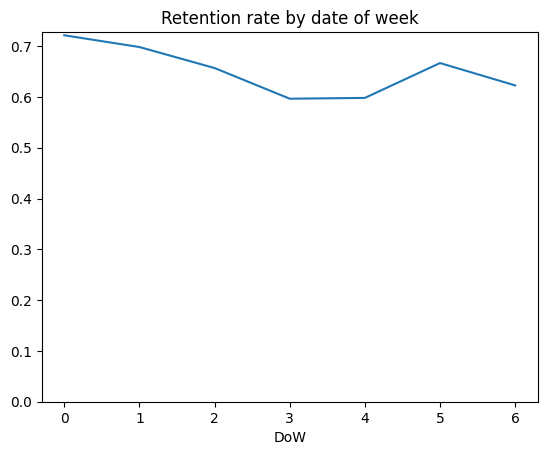

In [45]:
#Plotting the results: 
DoW_retention.plot()
plt.title("Retention rate by date of week")
plt.ylim(0)
plt.show()

# Resolving inconsistencies

In [46]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = marketing[marketing["converted"]==True].groupby(column_names)["user_id"].nunique()

    # Total number users
    column_total = marketing.groupby(column_names)["user_id"].nunique()  
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

In [47]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.548380129589633
Arabic index: 3.870950323974082
German index: 5.5448747883953065


In [48]:
# Group house_ads by date and language
converted = house_ads.groupby(["date_served","language_preferred"]).agg({'user_id':'nunique','converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level = 1))

In [49]:
converted_df = converted_df.reset_index()

# A/B Testing for Marketing

What is A/B testing?

Prior to running the test determine:
- What is the desired outcome of the test? 
- What is our hypothesis?
- What is the metric we are trying to impact (i.e., page views,conversions)?
- Will we get enough traffic to our site to reach statistical significance and make a decision in a timely manner?

A/B testing allows us to understand the marketing impact

The right time to determine key success metrics is when designing the experiment.

The main purpose is to make a personalized e-mail test in this project

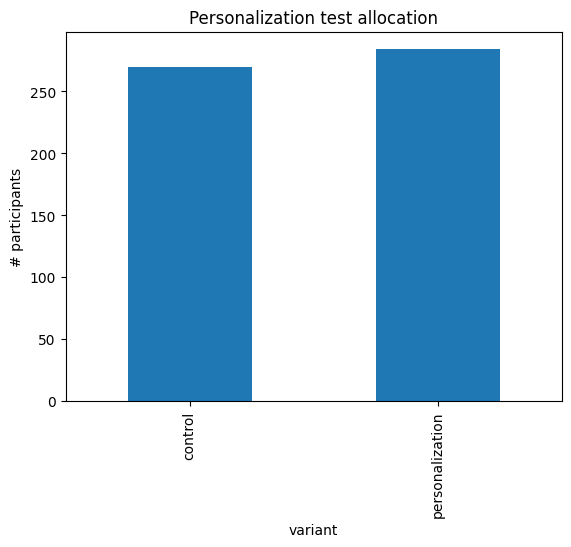

In [50]:
# Subset the DataFrame
email = marketing[marketing["marketing_channel"]=="Email"]

# Group the email DataFrame by variant 
alloc = email.groupby(["variant"])["user_id"].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = "bar")
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

Since we chose **conversion rate** as our key metrics for this test, it is highly important that we evaluate **whether or not conversion was higher in the personalization treatment compared with the control**. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

In [51]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             "variant"])["converted"].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

In [52]:
# Drop missing values from the control column
control = subscribers_df["control"].dropna()
# Drop missing values from the personalization column
personalization = subscribers_df["personalization"].dropna()

In [53]:
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


**Creating a lift function**

Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:

- Calculating lift: (Treatment conversion rate - Control conversion rate) / Control conversion rate
- The result is the percent difference between the control and treatment.

In this exercise, you will create a function to automate the process of calculating lift. 

In [54]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


- The personalization variant outperformed the control
- It's time to determine whether the result is statistically significant. Remember, statistical significance is vital to understanding whether a test showed a positive result by chance or if it is reflective of a true difference between the variants. This will enable our marketing team to make an informed choice about whether to roll out the feature or not.


P-values

T-statistic of 1.96 is typically statistically significant at the 95% level

Depending on the context of the test, you may be comfortable with a lower or higher level of statistical significance.

In [55]:
control = control.astype(int)
personalization = personalization.astype(int)

In [56]:
from scipy import stats
stats.ttest_ind(control, personalization)

Ttest_indResult(statistic=-2.734329944750507, pvalue=0.006451487844694182)

The results are statistically significant with p = 0.006.

**A/B testing & Segmentation**

In the previous lesson, we see that our personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. 

Sometimes features that are highly appealing to one group are less appealing to others.

Since you want to segment our data multiple times, you will build a function ab_segmentation() that analyzes the impact of your A/B tests on segments of data that you can reuse each time you want to conduct this kind of analysis.

Your function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

In [61]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()
      control = control.astype(int)
      personalization = personalization.astype(int)
      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data scientist, it's our responsibility to enable the marketing stakeholders to target users according to their preferences.

We will run through two segments in our data that may be relevant to assessing the impact of our test.

When using the ab_segmentation() function, remember to input the column name in quotes (i.e., 'language_displayed')

In [62]:
ab_segmentation("language_displayed")

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.19100834180787182, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [63]:
ab_segmentation("age_group")

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142212, pvalue=0.003872449439129706) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.185906464414798, pvalue=0.0023238487431765337) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.431790127931851, pvalue=0.017975686009788255) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.0654991273179326, pvalue=0.04306233968820123) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.326565456420339, pvalue=0.0016358623456360468) 




We found that personalization was **extremely effective** for **younger groups** but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.